Aaron Hurst \<amhurst@berkeley.edu\>

# Normalized distributions

These distributions should satisfy the condition:

\begin{equation}
\int\limits_{0}^{+\infty} \psi^{*}(x) \psi(x) dx = 1,
\end{equation}
where
\begin{equation}
\psi(x) \equiv N \phi(x),
\end{equation}
and
\begin{equation}
\psi^{*}(x) \equiv N^{*} \phi(x).
\end{equation}

Therefore,
\begin{eqnarray}
\int\limits_{0}^{+\infty} \psi^{*}(E_{n}) \psi(E_{n}) dE_{n} &=& \int\limits_{0}^{+\infty} (N^{*} \phi(E_{n})) (N \phi(E_{n})) dE_{n} \\
&=& N^{*}N \int\limits_{0}^{+\infty} \phi(E_{n}) \phi(E_{n}) dE_{n} = 1.
\end{eqnarray}

Because $N^{*}$ and $N$ differ only in signs of imaginary terms:
\begin{equation}
|N|^{2} \int\limits_{0}^{+\infty} \phi(E_{n}) \phi(E_{n}) dE_{n} = 1,
\end{equation}
and the normalization constant can be evaluated as
\begin{equation}
N = \sqrt{\frac{1}{\int\limits_{0}^{+\infty} \phi(E_{n}) \phi(E_{n}) dE_{n}}}.
\end{equation}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, trapezoid as trapz, simpson as simps

# Normalized neutron density probability distribution functions

The following PDFs for thermal neutrons ($T=293.16$ K) are defined in Ch. 2, Table 1, of the PGAA Handbook.  The adopted constants utilized in these functions together with their appropriate units are defined in the `Constants` class used in this `Notebook`.

### Energy ($E_{n}$):
\begin{equation}
p_{T}(E) = \frac{2}{\sqrt{\pi} E_{T}} \exp\left(\frac{-E_{n}}{E_{T}}\right) \sqrt{\frac{E_{n}}{E_{T}}};
\end{equation}

\begin{equation}
E_{T} = k_{B}T.
\end{equation}

### Velocity ($v$):
\begin{equation}
p_{T}(v) = \frac{4}{\sqrt{\pi}} \exp\left(\frac{-v^{2}}{v_{T}^{2}}\right) \frac{v^{2}}{v_{T}^{3}};
\end{equation}

\begin{equation}
v_{T} = \sqrt{\frac{2k_{B}T}{m_{n}}}.
\end{equation}

### Wavelength ($\lambda$):
\begin{equation}
p_{T}(\lambda) = \frac{4}{\sqrt{\pi}} \exp\left(\frac{-\lambda_{T}^{2}}{\lambda^{2}}\right) \frac{\lambda_{T}^{3}}{\lambda^{4}};
\end{equation}

\begin{equation}
\lambda_{T} = \sqrt{\frac{h^{2}}{2m_{n}k_{B}T}}.
\end{equation}


In [2]:
class Constants(object):
    __doc__="""Class containing definitions of constants needed for calculations
    involving thermal neutron energies, velocities and wavelengths."""
    
    kB_eVK = 0
    kB_JK = 0
    T = 0
    m_n = 0
    h_Js = 0
    h_eVs = 0
    def __init__(self):
        Constants.kB_eVK = 8.617343e-05 # eV/K
        Constants.kB_JK = 1.38066e-23 # J/K
        Constants.T = 293.16 # K
        Constants.m_n = 1.00866501 * 1.660566e-27 # kg
        Constants.h_Js = 6.62618e-34 # J*s
        Constants.h_eVs = 4.13567e-15 # eV*s


In [3]:
# Define neutron density probability distribution functions
class NeutronDensityPDFs(Constants):
    __doc__="""Class containing neutron-density PDFs."""
    
    def __init__(self):
        super().__init__()
    
    def p_E(self,E):
        """Neutron density probability distribution as a function of energy.
        Thermal neutrons: T = 293.16 K => E = 0.02526 eV = 2.526e-08 MeV."""
        E_T = Constants.kB_eVK*Constants.T
        return  2/(np.sqrt(np.pi)*E_T) * np.exp(-E/E_T) * np.sqrt(E/E_T)

    def p_velocity(self,v):
        """Neutron density probability distribution as a function of velocity.
        Thermal neutrons: T = 293.16 K => v = 2198 m/s.
        Approximate relation could also be used: v_T = 127.9*(T)**(1/2) [m/s]."""
        v_T = np.sqrt(2*Constants.kB_JK*Constants.T/Constants.m_n)
        return (4/np.sqrt(np.pi)) * np.exp(-(v**2)/v_T**2) * (v**2/v_T**3)

    def p_lambda(self,wave_length):
        """Neutron density probability distribution as a function of wavelength.
        Thermal neutrons: T = 293.16 K => lambda = 0.1797 nm = 1.797 A."""
        lambda_T = np.sqrt(Constants.h_Js**2/(2*Constants.m_n*Constants.kB_JK*Constants.T))
        lambda_T *= 1e+10 # Convert to Angstrom units
        return (4/np.sqrt(np.pi)) * np.exp(-(lambda_T**2)/wave_length**2) * ((lambda_T**3)/(wave_length**4))
    

# Normalized neutron flux probability distribution functions

The following PDFs for thermal neutrons ($T=293.16$ K) are defined in Ch. 2, Table 1, of the PGAA Handbook.  Energy ($E_{T}$), velocity ($v_{T}$), and wavelength ($\lambda_{T}$) parameters are the same as those defined above for the neutron density PDFs.

### Energy ($E_{n}$):
\begin{equation}
\phi_{T}(E) = \frac{\sqrt{\pi}}{2} \sqrt{\frac{E_{n}}{E_{T}}} p_{T}(E_{n}).
\end{equation}

### Velocity ($v$):
\begin{equation}
\phi_{T}(v) = \frac{\sqrt{\pi}}{2} \frac{v}{v_{T}} p_{T}(v).
\end{equation}

### Wavelength ($\lambda$):
\begin{equation}
\phi_{T}(\lambda) = \frac{\sqrt{\pi}}{2} \frac{\lambda_{T}}{\lambda} p_{T}(\lambda).
\end{equation}


In [4]:
# Define neutron flux probability distribution functions
class NeutronFluxPDFs(NeutronDensityPDFs):
    __doc__="""Class containing neutron-flux PDFs."""
    
    def __init__(self):
        super().__init__()
        
    def flux_E(self,E):
        """Neutron flux probability distribution as a function of energy."""
        E_T = Constants.kB_eVK*Constants.T
        return (np.sqrt(np.pi)/2)*np.sqrt(E/E_T)*NeutronDensityPDFs.p_E(self,E)
    
    def flux_v(self,v):
        """Neutron flux probability distribution as a function of velocity."""
        v_T = np.sqrt(2*Constants.kB_JK*Constants.T/Constants.m_n)
        return (np.sqrt(np.pi)/2)*(v/v_T)*NeutronDensityPDFs.p_velocity(self,v)
    
    def flux_lambda(self,wave_length):
        """Neutron flux probability distribution as a function of wavelength."""
        lambda_T = np.sqrt(Constants.h_Js**2/(2*Constants.m_n*Constants.kB_JK*Constants.T))
        lambda_T *= 1e+10 # Convert to Angstrom units
        return (np.sqrt(np.pi)/2)*(lambda_T/wave_length)*NeutronDensityPDFs.p_lambda(self,wave_length)
    

In [5]:
# Instantiate classes
C = Constants()
ND = NeutronDensityPDFs()
NF = NeutronFluxPDFs()

# Expectation values

Wavefunctions represented as vectors in Hilbert space should satisfy the aforementioned normalization condition.  All integration methods should, therefore, converge to reveal an inner product of 1 for the corresponding PDF.  Numerical methods can then be used to calculate "flux-weighted" expectation values for each distribution.  For example, the expectation value for the neutron energy $\langle E_{n} \rangle$ given by

\begin{equation}
\langle E_{n} \rangle = \int\limits_{-\infty}^{+\infty} \phi^{*}(E_{n}) \hat{E_{n}} \phi(E_{n}) dE_{n},
\end{equation}
may be obtained numerically from the following ratio:
\begin{equation}
\langle E_{n} \rangle = \frac{\int\limits_{0}^{+\infty} E_{n} \phi(E_{n}) dE_{n}}{\int\limits_{0}^{+\infty} \phi(E_{n}) dE_{n}}.
\end{equation}
However, because the spectra are normalized, the integral $\int\limits_{0}^{+\infty} \phi(E_{n}) dE_{n} = 1$ and, therefore, $\langle E_{n} \rangle = \int\limits_{0}^{+\infty} E_{n} \phi(E_{n}) dE_{n}$.

In [6]:
# Define function used to calculate expectation values
def expectation(convolved_dist_value, dist_integral):
    return convolved_dist_value/dist_integral

## Calculate PDFs 

Define linear spaces and plot corresponding $E_{n}$, $v$, and $\lambda$ distributions for thermal neutrons ($T=293.16$ K).

In [7]:
# For thermal neutrons define an 'eV' energy grid
E_neutron = np.linspace(0,1,100000)
prob_E = ND.p_E(E_neutron)
nflux_E = NF.flux_E(E_neutron)

# Define 'm/s' velocity grid
v_neutron = np.linspace(0,10000,100000)
prob_v = ND.p_velocity(v_neutron)
nflux_v = NF.flux_v(v_neutron)

# Define 'Angstrom' wavelength grid
wl_neutron = np.linspace(0.000001,10,100000)
prob_wl = ND.p_lambda(wl_neutron)
nflux_wl = NF.flux_lambda(wl_neutron)

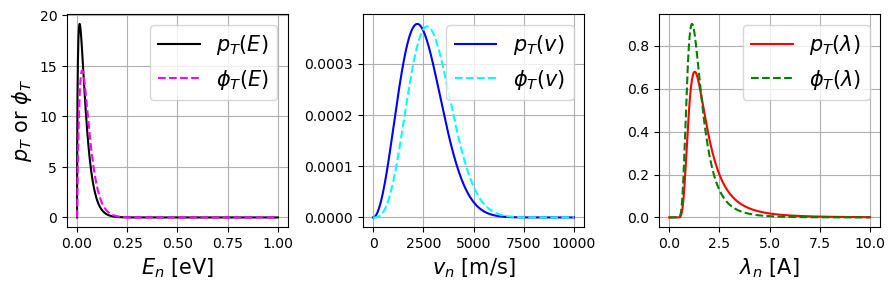

In [8]:
#%matplotlib notebook
# Plot spectra for the above neutron distributions

#f, ax = plt.subplots(figsize=(8,5))
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,3))
ax1.plot(E_neutron, prob_E, color='black', label=r'$p_{T}(E)$')
ax1.plot(E_neutron, nflux_E, color='magenta', linestyle='--', label=r'$\phi_{T}(E)$')
ax2.plot(v_neutron, prob_v, color='blue', label=r'$p_{T}(v)$')
ax2.plot(v_neutron, nflux_v, color='cyan', linestyle='--', label=r'$\phi_{T}(v)$')
ax3.plot(wl_neutron, prob_wl, color='red', label=r'$p_{T}(\lambda)$')
ax3.plot(wl_neutron, nflux_wl, color='green', linestyle='--', label=r'$\phi_{T}(\lambda)$')
ax1.legend(loc='best', fontsize=15)
ax2.legend(loc='best', fontsize=15)
ax3.legend(loc='best', fontsize=15)

ax1.set_xlabel(r'$E_{n}$ [eV]',size=15)
ax2.set_xlabel(r'$v_{n}$ [m/s]',size=15)
ax3.set_xlabel(r'$\lambda_{n}$ [A]',size=15)
ax1.set_ylabel(r'$p_{T}$ or $\phi_{T}$',size=15)

#ax1.set_yscale('log')
#ax1.set_yscale('linear')
#ax1.set_xscale('log')
#ax1.set_xscale('linear')

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

#plt.grid()
plt.tight_layout()
#plt.savefig("normalized_prob_dists.pdf",dpi=f.dpi)
plt.show()

## Neutron energy $p_{T}(E_{n})$ and $\phi_{T}(E_{n})$ calculations

In [9]:
# Check integrals of normalized spectra to ensure normalization condition is satisfied
# p(E) integrations
analytic_integral_prob_E = quad(ND.p_E, 0, np.inf)
print(analytic_integral_prob_E)
trapz_integral_prob_E = trapz(ND.p_E(E_neutron), E_neutron)
simps_integral_prob_E = simps(ND.p_E(E_neutron), E_neutron)

# phi(E) integrations
analytic_integral_flux_E = quad(NF.flux_E, 0, np.inf)
print(analytic_integral_flux_E)
trapz_integral_flux_E = trapz(NF.flux_E(E_neutron), E_neutron)
simps_integral_flux_E = simps(NF.flux_E(E_neutron), E_neutron)

(0.9999999999999086, 9.367658981851434e-09)
(0.9999999999999998, 1.0255791653424051e-08)


In [10]:
print("Probability as a function of energy integrations:")
print("Analytical integration [p(E); T=293.16 K]: {0}".format(analytic_integral_prob_E[0]))
print("Trapezium integration [p(E); T=293.16 K]: {0}".format(trapz_integral_prob_E))
print("Simpson integration [p(E); T=293.16 K]: {0}".format(simps_integral_prob_E))

print("\nFlux as a function of energy integrations:")
print("Analytical integration [phi(E); T=293.16 K]: {0}".format(analytic_integral_flux_E[0]))
print("Trapezium integration [phi(E); T=293.16 K]: {0}".format(trapz_integral_flux_E))
print("Simpson integration [phi(E); T=293.16 K]: {0}".format(simps_integral_flux_E))

Probability as a function of energy integrations:
Analytical integration [p(E); T=293.16 K]: 0.9999999999999086
Trapezium integration [p(E); T=293.16 K]: 0.9999981526504869
Simpson integration [p(E); T=293.16 K]: 0.9999992784805986

Flux as a function of energy integrations:
Analytical integration [phi(E); T=293.16 K]: 0.9999999999999998
Trapezium integration [phi(E); T=293.16 K]: 0.9999999869421624
Simpson integration [phi(E); T=293.16 K]: 0.9999999999999992


In [11]:
# Calculate expectation energies
# p(E) expectation values
phi_interp_prob_E = np.array([ND.p_E(E_n) for E_n in E_neutron])
convolved_prob_E_t = trapz((phi_interp_prob_E*E_neutron), E_neutron)
convolved_prob_E_s = simps((phi_interp_prob_E*E_neutron), E_neutron)
expected_prob_E_t = expectation(convolved_prob_E_t,trapz_integral_prob_E)
expected_prob_E_s = expectation(convolved_prob_E_s,simps_integral_prob_E)
print("Probability expectation values:")
print("Expectation energy [p(E); trapezium method] = {0} eV".format(expected_prob_E_t))
print("Expectation energy [p(E); Simpson method] = {0} eV\n".format(expected_prob_E_s))

# phi(E) expectation values
phi_interp_flux_E = np.array([NF.flux_E(E_n) for E_n in E_neutron])
convolved_flux_E_t = trapz((phi_interp_flux_E*E_neutron), E_neutron)
convolved_flux_E_s = simps((phi_interp_flux_E*E_neutron), E_neutron)
expected_flux_E_t = expectation(convolved_flux_E_t,trapz_integral_flux_E)
expected_flux_E_s = expectation(convolved_flux_E_s,simps_integral_flux_E)
print("\nFlux expectation values:")
print("Expectation energy [phi(E); trapezium method] = {0} eV".format(expected_flux_E_t))
print("Expectation energy [phi(E); Simpson method] = {0} eV\n".format(expected_flux_E_s))

Probability expectation values:
Expectation energy [p(E); trapezium method] = 0.03789397410934945 eV
Expectation energy [p(E); Simpson method] = 0.03789393145065825 eV


Flux expectation values:
Expectation energy [phi(E); trapezium method] = 0.050525206137349656 eV
Expectation energy [phi(E); Simpson method] = 0.05052520547759978 eV



In [12]:
# Compare with results quoted in PGAA handbook (Ch. 2, Table 1.)
# Expectation energy deduced above compares will with mean-reported value.

E_T = C.kB_eVK * C.T

# p(E) comparison
print("p(E) comparison with PGAA:")
print("Thermal neutron energy parameter E(T=293.16 K) = {0} eV".format(E_T))
print("Most probable neutron energy = {0} eV".format(1/2 * E_T))
print("Mean neutron energy = {0} eV".format(3/2 * E_T))

# phi(E) comparison
print("\nphi(E) comparison with PGAA:")
print("Thermal neutron energy parameter E(T=293.16 K) = {0} eV".format(E_T))
print("Most probable neutron energy = {0} eV".format(E_T))
print("Mean neutron energy = {0} eV".format(2 * E_T))

p(E) comparison with PGAA:
Thermal neutron energy parameter E(T=293.16 K) = 0.025262602738800002 eV
Most probable neutron energy = 0.012631301369400001 eV
Mean neutron energy = 0.037893904108200004 eV

phi(E) comparison with PGAA:
Thermal neutron energy parameter E(T=293.16 K) = 0.025262602738800002 eV
Most probable neutron energy = 0.025262602738800002 eV
Mean neutron energy = 0.050525205477600005 eV


## Neutron velocity $p_{T}(v)$ and $\phi_{T}(v)$ calculations

In [ ]:
# Check integrals of normalized spectra to ensure normalization condition is satisfied
# p(v) integrations
analytic_integral_prob_v = quad(ND.p_velocity, 0, np.inf)
print(analytic_integral_prob_v)
trapz_integral_prob_v = trapz(ND.p_velocity(v_neutron), v_neutron)
simps_integral_prob_v = simps(ND.p_velocity(v_neutron), v_neutron)

# phi(v) integrations
analytic_integral_flux_v = quad(NF.flux_v, 0, np.inf)
print(analytic_integral_flux_v)
trapz_integral_flux_v = trapz(NF.flux_v(v_neutron), v_neutron)
simps_integral_flux_v = simps(NF.flux_v(v_neutron), v_neutron)

In [ ]:
print("Probability as a function of velocity integrations:")
print("Analytical integration [p(v); T=293.16 K]: {0}".format(analytic_integral_prob_v[0]))
print("Trapezium integration [p(v); T=293.16 K]: {0}".format(trapz_integral_prob_v))
print("Simpson integration [p(v); T=293.16 K]: {0}".format(simps_integral_prob_v))

print("\nFlux as a function of velocity integrations:")
print("Analytical integration [p(v); T=293.16 K]: {0}".format(analytic_integral_prob_v[0]))
print("Trapezium integration [p(v); T=293.16 K]: {0}".format(trapz_integral_prob_v))
print("Simpson integration [p(v); T=293.16 K]: {0}".format(simps_integral_prob_v))

In [ ]:
# Calculate expectation velocities
# p(v) expectation values
phi_interp_prob_v = np.array([ND.p_velocity(v_n) for v_n in v_neutron])
convolved_prob_v_t = trapz((phi_interp_prob_v*v_neutron), v_neutron)
convolved_prob_v_s = simps((phi_interp_prob_v*v_neutron), v_neutron)
expected_prob_v_t = expectation(convolved_prob_v_t,trapz_integral_prob_v)
expected_prob_v_s = expectation(convolved_prob_v_s,simps_integral_prob_v)
print("Probability expectation values:")
print("Expectation velocity [p(v); trapezium method] = {0} m/s".format(expected_prob_v_t))
print("Expectation velocity [p(v); Simpson method] = {0} m/s\n".format(expected_prob_v_s))

# phi(v) expectation values
phi_interp_flux_v = np.array([NF.flux_v(v_n) for v_n in v_neutron])
convolved_flux_v_t = trapz((phi_interp_flux_v*v_neutron), v_neutron)
convolved_flux_v_s = simps((phi_interp_flux_v*v_neutron), v_neutron)
expected_flux_v_t = expectation(convolved_flux_v_t,trapz_integral_flux_v)
expected_flux_v_s = expectation(convolved_flux_v_s,simps_integral_flux_v)
print("Flux expectation values:")
print("Expectation velocity [phi(v); trapezium method] = {0} m/s".format(expected_flux_v_t))
print("Expectation velocity [phi(v); Simpson method] = {0} m/s\n".format(expected_flux_v_s))

In [ ]:
# Compare with results quoted in PGAA handbook (Ch. 2, Table 1.)
# Expectation velcoity deduced above compares will with mean-reported value.

v_T = np.sqrt(2*C.kB_JK*C.T/C.m_n)

# p(v) comparison
print("p(v) comparison with PGAA:")
print("Thermal neutron velocity parameter v(T=293.16 K) = {0} m/s".format(v_T))
print("Most probable neutron velocity = {0} m/s".format(v_T))
print("Mean neutron velocity = {0} m/s".format(2*v_T/np.sqrt(np.pi)))

# phi(v) comparison
print("\nphi(v) comparison with PGAA:")
print("Thermal neutron velocity parameter v(T=293.16 K) = {0} m/s".format(v_T))
print("Most probable neutron velocity = {0} m/s".format(np.sqrt(3/2) * v_T))
print("Mean neutron velocity = {0} m/s".format(3*np.sqrt(np.pi)*v_T/4))

## Neutron wavelength $p_{T}(\lambda)$ calculations

In [ ]:
# Check integrals of normalized spectra to ensure normalization condition is satisfied
# p(lambda) integrations
analytic_integral_prob_lambda = quad(ND.p_lambda, 0, np.inf)
print(analytic_integral_prob_lambda)
trapz_integral_prob_lambda = trapz(ND.p_lambda(wl_neutron), wl_neutron)
simps_integral_prob_lambda = simps(ND.p_lambda(wl_neutron), wl_neutron)

# phi(lambda) integrations
analytic_integral_flux_lambda = quad(NF.flux_lambda, 0, np.inf)
print(analytic_integral_flux_lambda)
trapz_integral_flux_lambda = trapz(NF.flux_lambda(wl_neutron), wl_neutron)
simps_integral_flux_lambda = simps(NF.flux_lambda(wl_neutron), wl_neutron)

In [ ]:
print("Probability as a function of wavelength integrations:")
print("Analytical integration [p(lambda); T=293.16 K]: {0}".format(analytic_integral_prob_lambda[0]))
print("Trapezium integration [p(lambda); T=293.16 K]: {0}".format(trapz_integral_prob_lambda))
print("Simpson integration [p(lambda); T=293.16 K]: {0}".format(simps_integral_prob_lambda))

print("\nFlux as a function of wavelength integrations:")
print("Analytical integration [p(lambda); T=293.16 K]: {0}".format(analytic_integral_flux_lambda[0]))
print("Trapezium integration [p(lambda); T=293.16 K]: {0}".format(trapz_integral_flux_lambda))
print("Simpson integration [p(lambda); T=293.16 K]: {0}".format(simps_integral_flux_lambda))

In [ ]:
# Calculate expectation wavelengths
# p(lambda) expectation values
phi_interp_prob_lambda = np.array([ND.p_lambda(wl_n) for wl_n in wl_neutron])
convolved_prob_lambda_t = trapz((phi_interp_prob_lambda*wl_neutron), wl_neutron)
convolved_prob_lambda_s = simps((phi_interp_prob_lambda*wl_neutron), wl_neutron)
expected_prob_lambda_t = expectation(convolved_prob_lambda_t,trapz_integral_prob_lambda)
expected_prob_lambda_s = expectation(convolved_prob_lambda_s,simps_integral_prob_lambda)
print("Probability expectation values:")
print("Expectation wavelength [p(lambda); trapezium method] = {0} A".format(expected_prob_lambda_t))
print("Expectation wavelength [p(lambda); Simpson method] = {0} A\n".format(expected_prob_lambda_s))

# phi(lambda) expectation values
phi_interp_flux_lambda = np.array([NF.flux_lambda(wl_n) for wl_n in wl_neutron])
convolved_flux_lambda_t = trapz((phi_interp_flux_lambda*wl_neutron), wl_neutron)
convolved_flux_lambda_s = simps((phi_interp_flux_lambda*wl_neutron), wl_neutron)
expected_flux_lambda_t = expectation(convolved_flux_lambda_t,trapz_integral_flux_lambda)
expected_flux_lambda_s = expectation(convolved_flux_lambda_s,simps_integral_flux_lambda)
print("Flux expectation values:")
print("Expectation wavelength [phi(lambda); trapezium method] = {0} A".format(expected_flux_lambda_t))
print("Expectation wavelength [phi(lambda); Simpson method] = {0} A\n".format(expected_flux_lambda_s))

In [ ]:
# Compare with results quoted in PGAA handbook (Ch. 2, Table 1.)
# Expectation wavelength deduced above compares will with mean-reported value.

lambda_T = np.sqrt(C.h_Js**2/(2*C.m_n*C.kB_JK*C.T))

# p(lambda) comparison
print("p(lambda) comparison with PGAA:")
print("Thermal neutron wavelength parameter lambda(T=293.16 K) = {0} m".format(lambda_T))
print("Most probable neutron wavelength = {0} m".format((np.sqrt(2)/2)*lambda_T))
print("Mean neutron wavelength = {0} m".format(2*lambda_T/np.sqrt(np.pi)))

# phi(lambda) comparison
print("\nphi(lambda) comparison with PGAA:")
print("Thermal neutron wavelength parameter lambda(T=293.16 K) = {0} m".format(lambda_T))
print("Most probable neutron wavelength = {0} m".format((np.sqrt(2)/5)*lambda_T))
print("Mean neutron wavelength = {0} m".format(np.sqrt(np.pi)*lambda_T/2))